# TreeEvaluation

**Qué vamos a ver:**
- Introducción. Entorno de trabajo
- Entrenando un árbol de decisión (clasificación)
  - Holdout: 1/3 test y el resto entrenamiento
  - Validación cruzada: se divide en un numero k y se divide y alternan
  - Modificación de hiperparámetros: modifica los parámetros para no aprender de memoria
  - Variables categóricas
- Árboles de regresión

**Tipos de variables:**
- categóricas (pequeño/mediano/grande)
- numéricas
- cardenal

## Introducción.
---
**1. Python básico.**

In [1]:
# Esto es una lista.
a = [1, 2, 3]
print(a)

[1, 2, 3]


**2. Numpy: vectores y matrices con números.**

In [2]:
# Importamos la libreria numpy
import numpy as np

# Esto es un vector y una matriz con numpy. Solo puede contener números.
a = np.array([1, 2, 3])
print("This is a vector: ", a)
b = np.array([[1, 2, 3], 
              [4, 5, 6]])
print("This is a matrix: ", b)

This is a vector:  [1 2 3]
This is a matrix:  [[1 2 3]
 [4 5 6]]


**3. Pandas: data frames.**

Parece que pandas dataframes son una estructura de datos apropiada para representar datos. Sin embargo, scikit-learn sólo puede utilizar matrices numpy. Por lo tanto, los valores categóricos deben ser codificados como números. El flujo de trabajo típico cuando se trabaja con scikit-learn es:
1. Cargar los datos como Pandas dataframe
2. Llevar a cabo un análisis exploratorio de los datos para comprenderlos. Se conoce como  EDA (Exploratory Data Analysis)
3. Codificar los Pandas dataframe como matrices numpy (procesar los valores categóricos y los valores inexistentes - missing values)
4. Diseñar los modelos de aprendizaje automático con la librería scikit-learn

In [3]:
# Importamos la libreria pandas
import pandas as pd

# Esto es un dataframe con pandas.
a = pd.DataFrame({'a': [1, 2, 3], 'b': ['a', 'b', 'c']})
print("This is a dataframe: ")
print(a)

This is a dataframe: 
   a  b
0  1  a
1  2  b
2  3  c


## Scikit-learn (sklearn)
---

- Colección de algoritmos y herramientas de aprendizaje automático en Python.
- [http://scikit-learn.org/stable/](SCIKIT-LEARN)
- Otros paquetes de aprendizaje automático en Python:
    - Pylearn2
    - PyBrain
    - ...



Datos de entrada para sklearn (matrices numéricas).

- Los conjuntos de datos para sklearn son matrices numpy numéricas.
- Esto implica que los atributos/características categóricas deben ser representadas como:
    - Enteros
    - One-hot-encoding / variables dummy

- Sin embargo, hay una tendencia para integrar Pandas dataframes con scikit learn.
- Los valores inexistentes se representan como np.nan.

In [4]:
# Importamos las librerias necesarias.
import numpy as np
from sklearn.datasets import load_iris

iris_meta = load_iris()

print(iris_meta.feature_names)
print(iris_meta.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
# Variables/características/atributos de entrada y la variable objetivo/salida.
X = iris_meta.data      # Variables de entrada. Numpy array de 2 dimensiones.
y = iris_meta.target    # Variable de salida. Numpy vector.

print(type(X))
print(X.shape) # 150 instancias and 4 características de entrada
print(X.dtype) # Lo valores son números reales (float)

print(type(y))
print(y.shape) # 150 valores de la variable objetivo
print(y.dtype) # Los valores son enteros

<class 'numpy.ndarray'>
(150, 4)
float64
<class 'numpy.ndarray'>
(150,)
int64


In [6]:
# Imprimir las 10 primeras estancias.
print(X[0:10,0:4])
print(y[:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
"""
Visualizamos toda la tabla, siendo la variable de respuesta la última columna. 
No es necesario hacer esto cuando se trabaja con sklearn, es sólo para visualizarlo
"""

np.concatenate((X,y[:,np.newaxis]), axis=1)[0:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

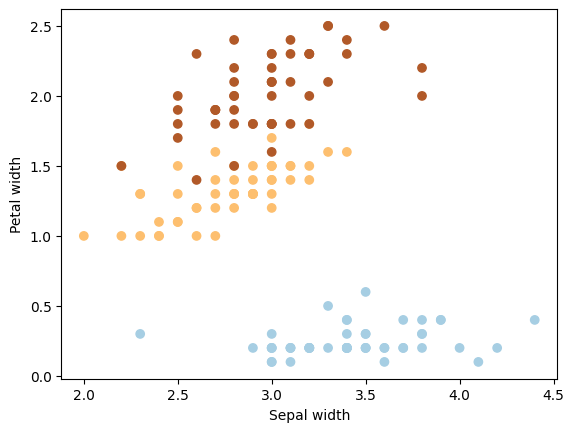

In [8]:
"""
Dibujamos el conjunto de datos del dataset iris para ver cómo se distribuye.
"""

import matplotlib.pyplot as plt

plt.scatter(X[:, 1], X[:, 3], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()

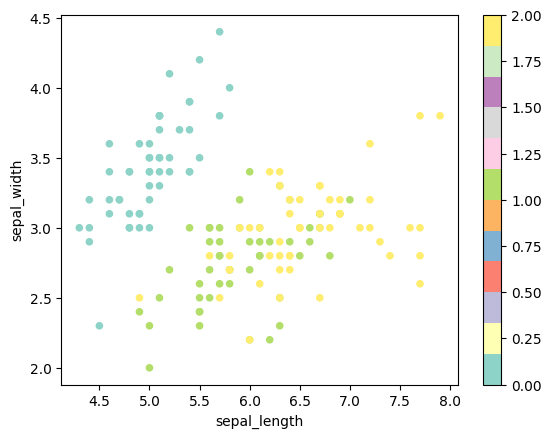

In [9]:
"""
Para ver cómo se integran los pandas con matplotlib.
"""

import pandas as pd
import matplotlib.pyplot as plt

# Crear un dataframe con pandas.
df_X = pd.DataFrame(X, columns=iris_meta.feature_names)
df_X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_X['Iris'] = y

# Dibujar el dataframe.
df_X.plot.scatter(x='sepal_length', y='sepal_width', c=y, cmap=plt.cm.Set3)
plt.show()

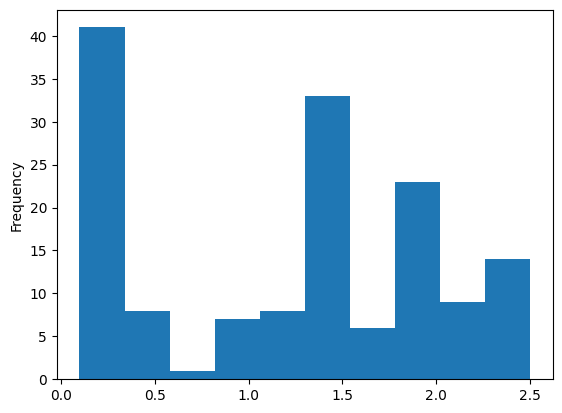

In [10]:
"""
Para dibujar un histograma de una de las variables.
"""

df_X.petal_width.plot.hist()
# Probar más configuraciones
# df_X.petal_width.plot.hist(bins=50, xlim=(0.3))
plt.show()

# Otras opciones
# df_X["petal_width"].hist()

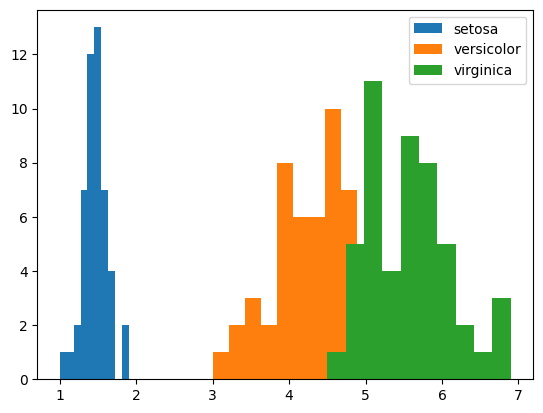

In [11]:
plt.hist(X[0:49,2], label='setosa')
plt.hist(X[50:99,2], label='versicolor')
plt.hist(X[100:149,2], label='virginica')
plt.legend(loc='upper right')
plt.show()

## Ejercicio 1.

Mediante el histograma, podemos ver la distribucción de las variables de entrada teniendo en cuenta la clase. ¿Cuál es la mejor variable de entrada que nos permite separar las distintas clases?

Hay una librería de visualización (seaborn) que posee un conjunto de funciones estadísticas gráficas. Trabaja sobre matplotlib

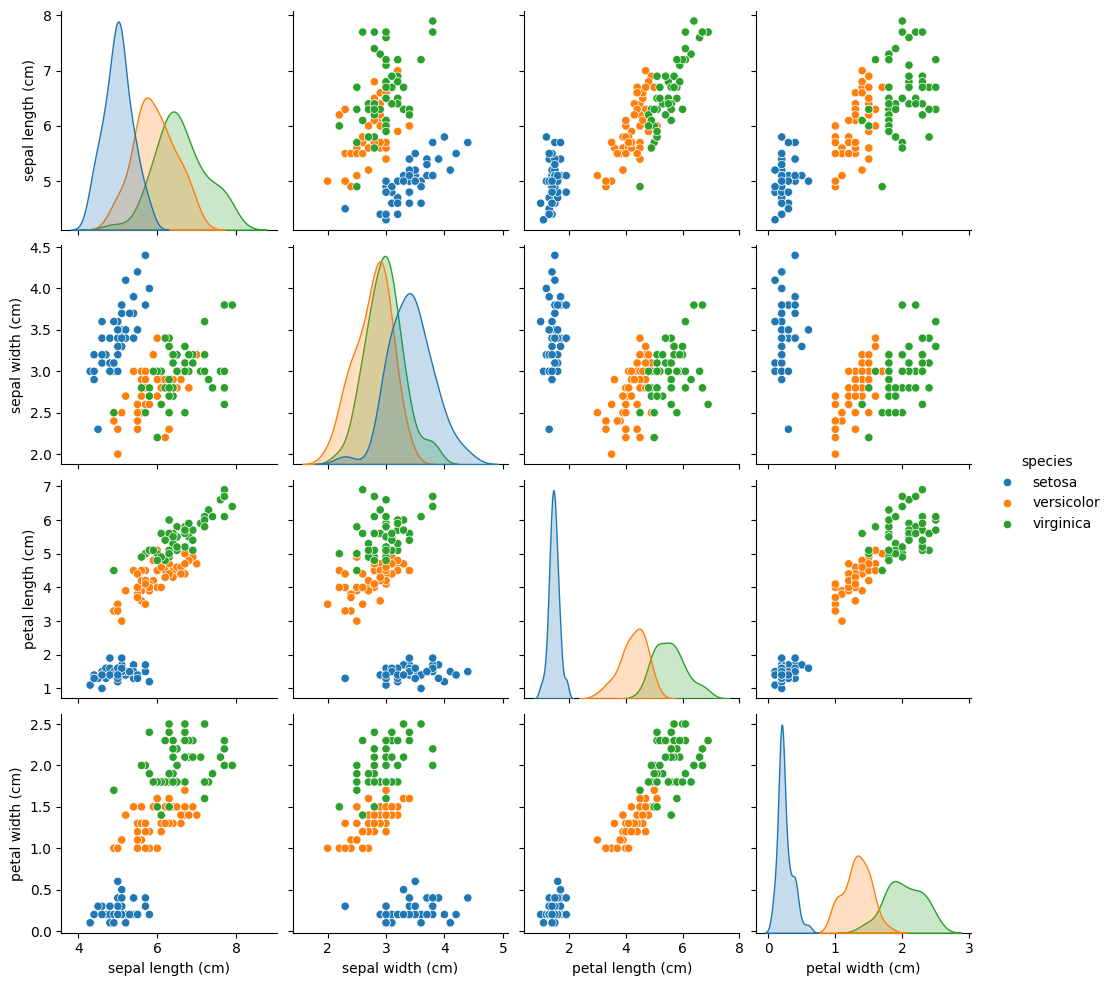

In [12]:
import seaborn as sns
import pandas as pd

my_column_names=iris_meta.feature_names.copy()
my_column_names.append('species')

iris=np.concatenate((X,y[:,np.newaxis]), axis=1)

#Creamos el dataframe
df_iris = pd.DataFrame(data=iris, columns=my_column_names)

#Cambiamos el valor de la variable de salida
df_iris.loc[df_iris['species'] == 0.0, 'species'] = 'setosa'
df_iris.loc[df_iris['species'] == 1.0, 'species'] = 'versicolor'
df_iris.loc[df_iris['species'] == 2.0, 'species'] = 'virginica'


g = sns.pairplot(df_iris, hue='species')

## Ejercicio 2.

Dibujar un gráfica de barras para comprobar si el problema se encuentra balenceado (pista: usar barplot)

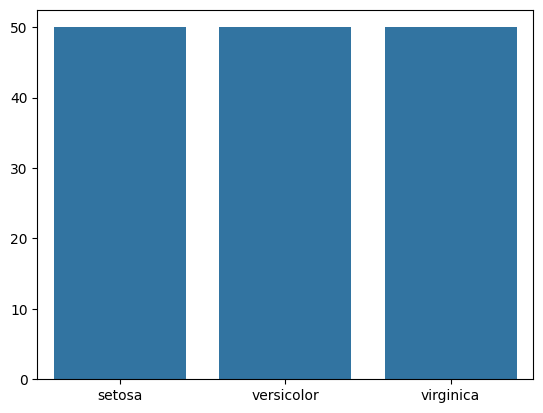

In [13]:
# Solución.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

lista=[np.count_nonzero(y == 0), np.count_nonzero(y == 1), np.count_nonzero(y == 2)]
sns.barplot(x = ['setosa','versicolor','virginica'], y = lista)
plt.show()

## Entrenando un árbol de decisión.
---

In [14]:
# Tarda un poco.

from sklearn import tree

# Aquí definimos el tipo de método de entrenamiento (todavía no pasa nada)
clf = tree.DecisionTreeClassifier()

# Ahora, entrenamos (*fit*) el método en el conjunto de datos (X,y)
clf.fit(X, y)
# clf **ha sido modificado** y ahora contiene el modelo entrenado

DecisionTreeClassifier()

In [15]:
# Para visualizar el árbol como texto. 
text_representation = tree.export_text(clf, feature_names=iris_meta.feature_names)
print(text_representation)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



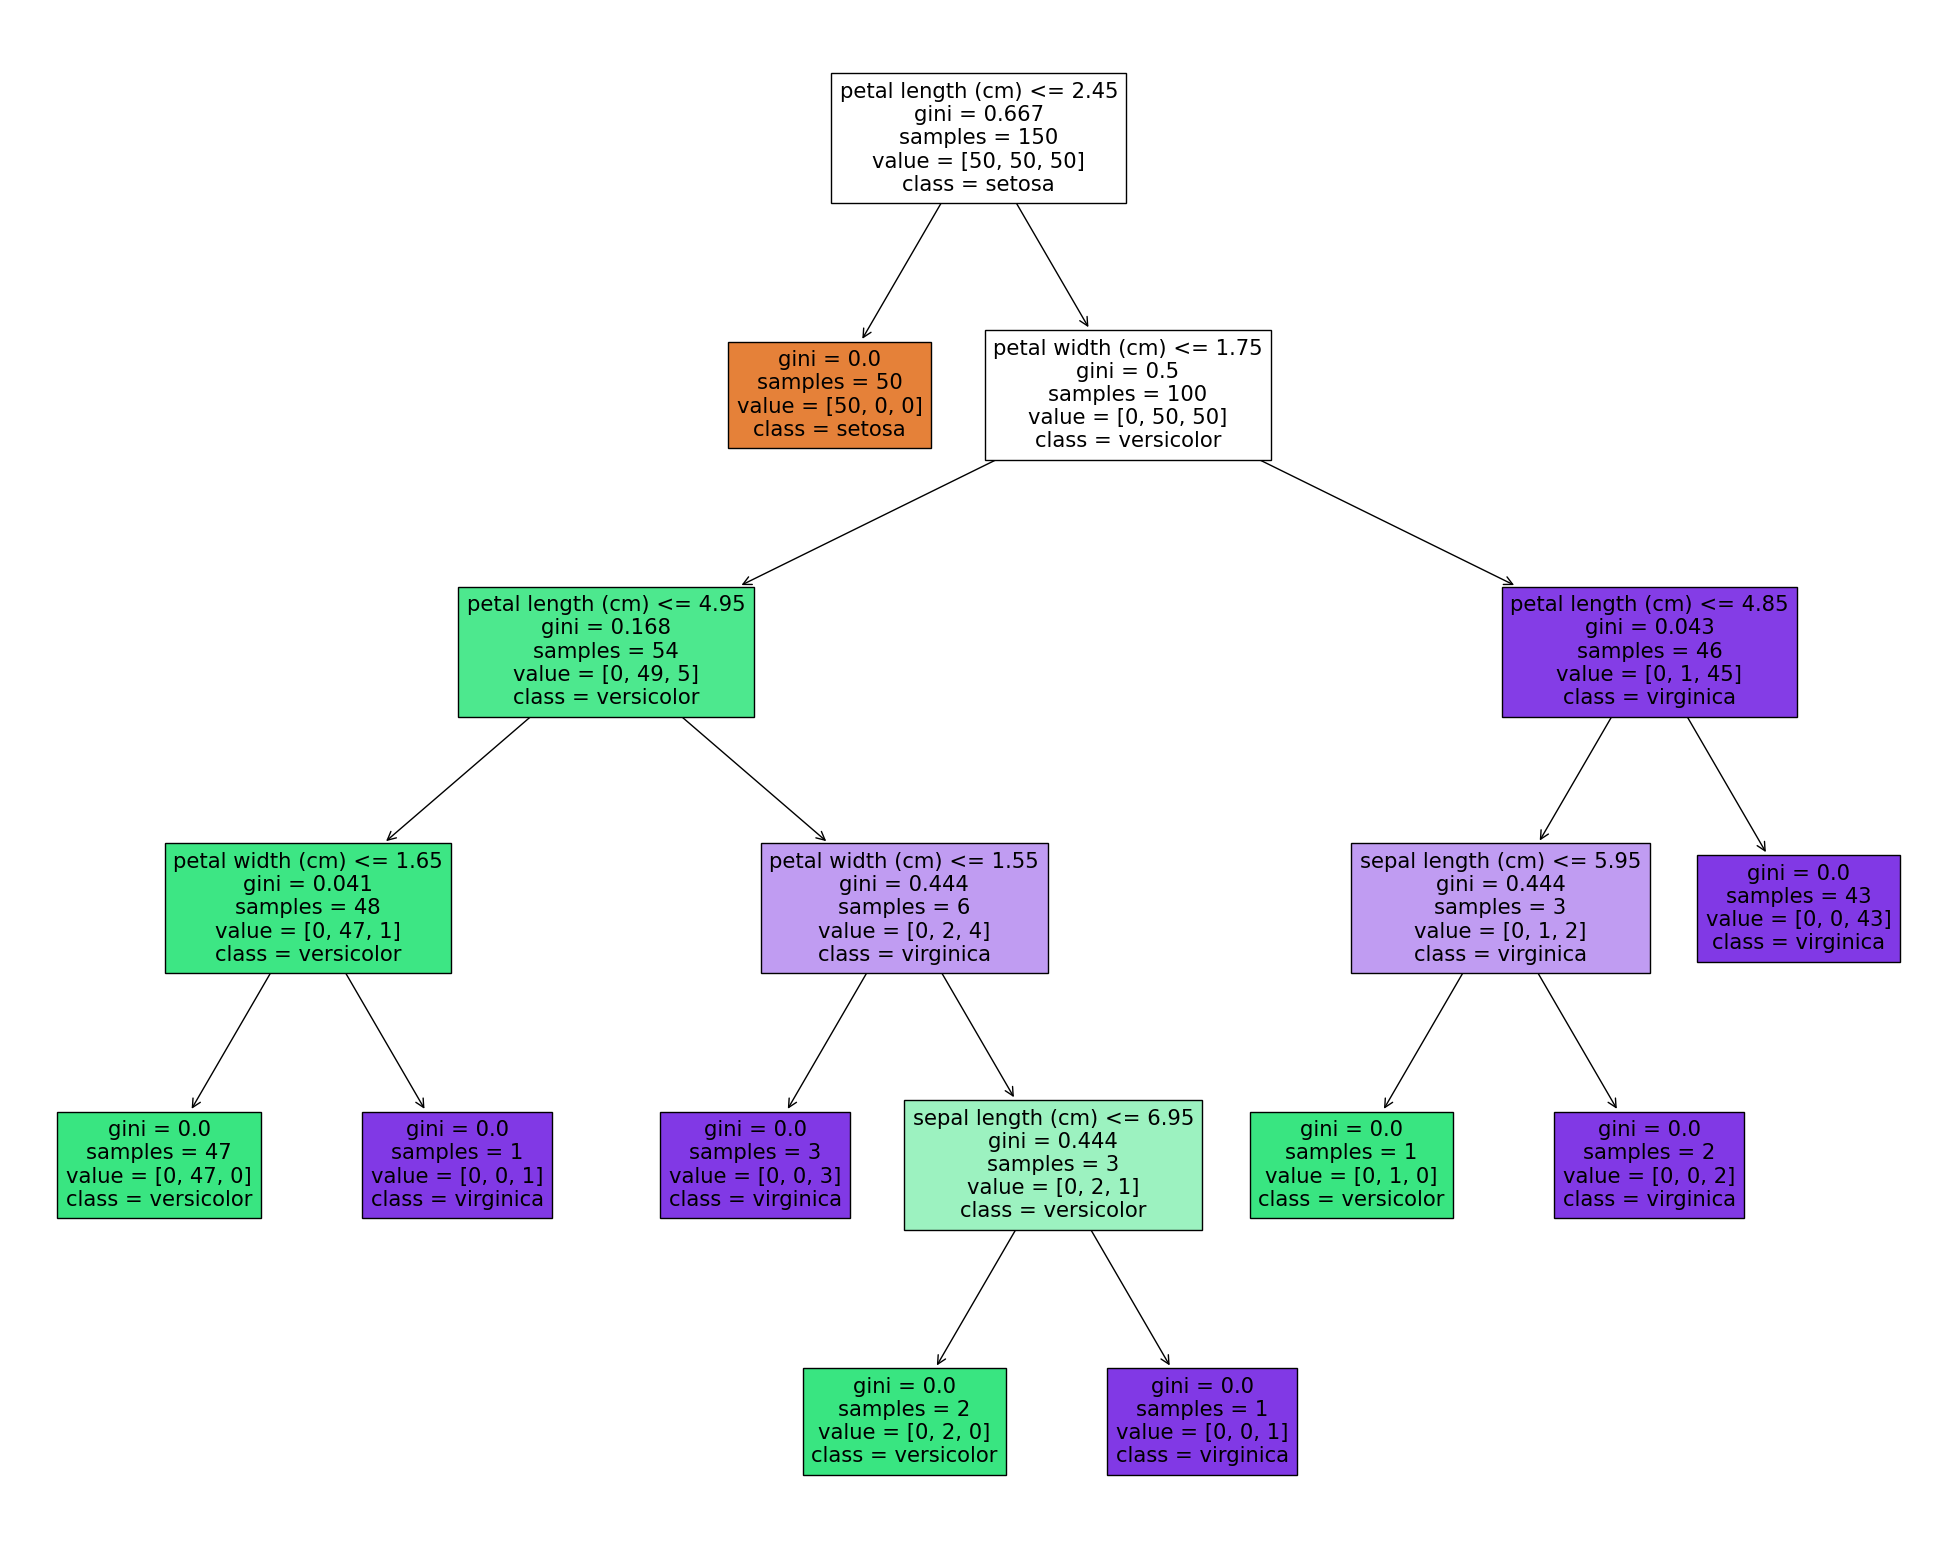

In [16]:
# Para visualizar el árbol gráficamente.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

### <u>1. HOLDOUT.</u>

Entrenamiento y evalución de un árbol de decisión con un conjunto de pruebas. 

- Creamos las particiones de entrenamiento (X_train, y_train) y de prueba (X_test, y_test): 
    - 2/3 para entrenamiento
    - 1/3 para pruebas
- Fíjate en el **random_state = 42** para la reproducibilidad. 

In [17]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train[0:5]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ]])

In [19]:
# Configuración de las particiones de entrenamiento y de prueba.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [20]:
# Imprimir las 5 primeras instancias de entrenamiento.
print("Input features:")
print(X_train[:5, :])
print("Response:")
print(y_train[:5])

Input features:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
Response:
[1 2 1 0 2]


In [21]:
# Si volvemos a crear la partición, será igual que antes si utilizamos el mismo random_state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Input features:")
print(X_train[:5, :])


Input features:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


In [22]:
# Pero si cambiamos el random_state, será diferente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

print("Input features:")
print(X_train[:5, :])

Input features:
[[4.7 3.2 1.3 0.2]
 [4.3 3.  1.1 0.1]
 [5.4 3.9 1.3 0.4]
 [5.5 2.6 4.4 1.2]
 [6.1 2.6 5.6 1.4]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn import tree

# Definimos el modelo
clf = tree.DecisionTreeClassifier()

# Permitir que los resultados sean reproducibles, en caso de que el entrenamiento del arbol sea no determinista
np.random.seed(42)

# Entrenamos el modelo con .fit
clf.fit(X_train, y_train)

# We can see that the tree is inside
print(tree.export_text(clf))

# Para obtener ayuda con cualquier funcion, por ejemplo .fit
# ?clf.fit

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [25]:
# Evaluamos el árbol, calculando las prediciones sobre el conjunto de pruebas.
y_test_pred = clf.predict(X_test)

# Comprobamos las predicciones para las insancias de prueba.
print(y_test_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [26]:
# Para una mejor visualización, podemos comparar las predicciones y los valores reales.
# Vemos que para los 5 primeros casos coinciden.
print(np.hstack((y_test_pred[:5, np.newaxis], y_test[:5, np.newaxis])))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


1.1. Metrics.

- accuracy
- otras métricas
- matriz de confusión

0.98
Clasification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Precision:  [1.     0.9375 1.    ]
Recall:  [1.     1.     0.9375]
Fscore:  [1.         0.96774194 0.96774194]
Support:  [19 15 16]


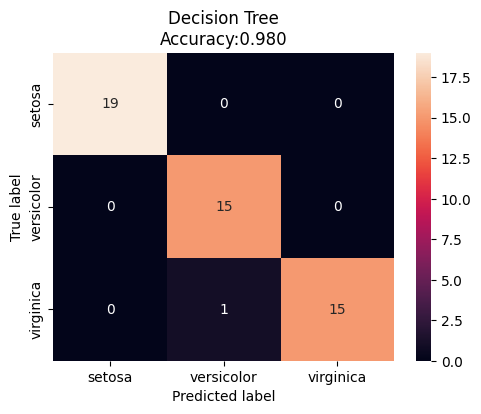

In [27]:
"""
Para evaluar el modelo en la partición de prueba, podemos calcular una métrica
(precisión o accurecy) de la clasificación en este caso.
"""
from sklearn import metrics

# Calculamos la precisión.
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_tree)

print("Clasification report:")
resultado = metrics.classification_report(y_test, y_test_pred)
print(resultado)

# Podemos utilizar otras métricas.
precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_test_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("Fscore: ", fscore)
print("Support: ", support)

# Creamos la matriz de confusión.
cm = metrics.confusion_matrix(y_test, y_test_pred)
# Trandormamos de df para poder visualizarlo mejor.
cm_df = pd.DataFrame(cm, 
                     index = iris_meta.target_names, 
                     columns = iris_meta.target_names)
# Visualizamos la matriz de confusión.
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree\nAccuracy:{0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1.2. Curvas ROC.

- Una forma de ver el rendimiento de un clasificador.
- Se usan para clasificaciones binarias.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50

|--- feature_3 <= 1.55
|   |--- class: 0
|--- feature_3 >  1.55
|   |--- class: 1



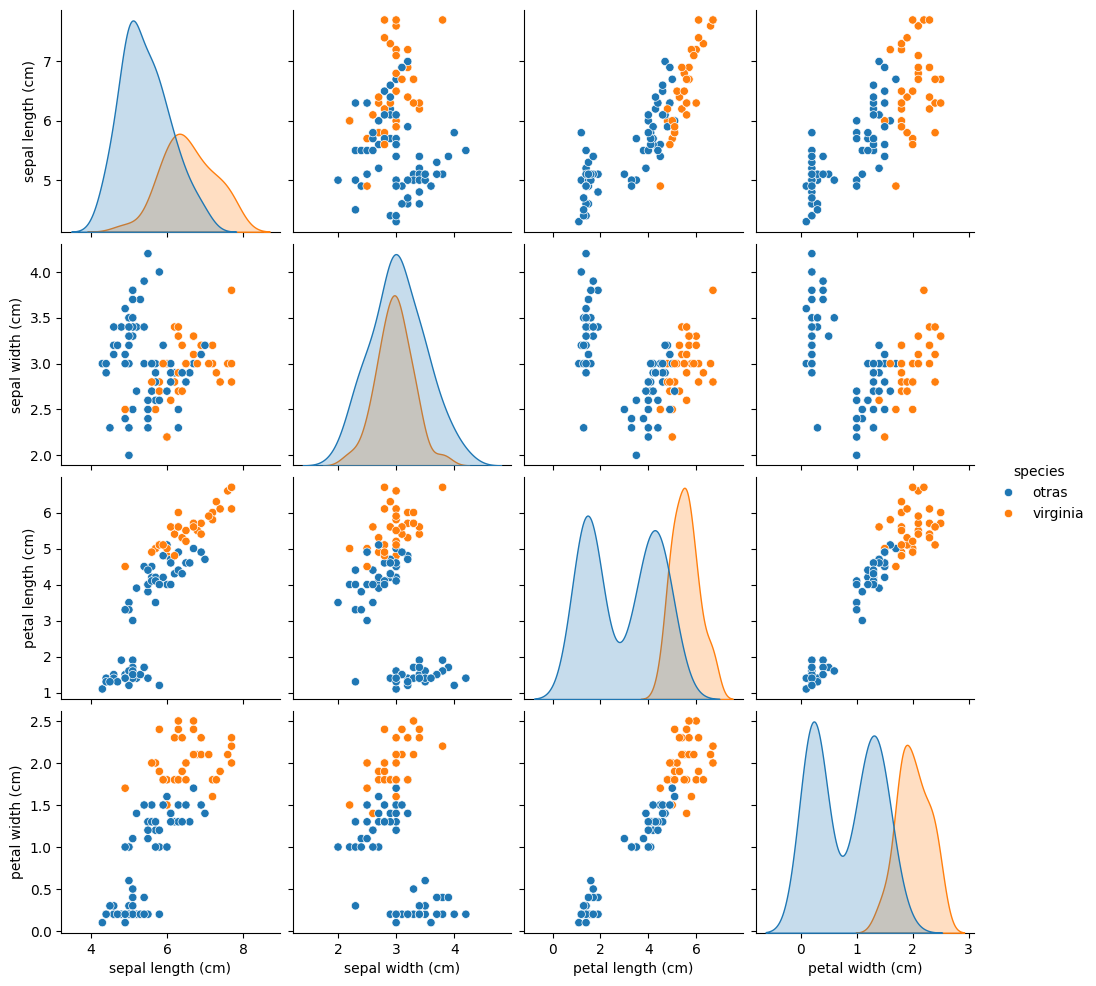

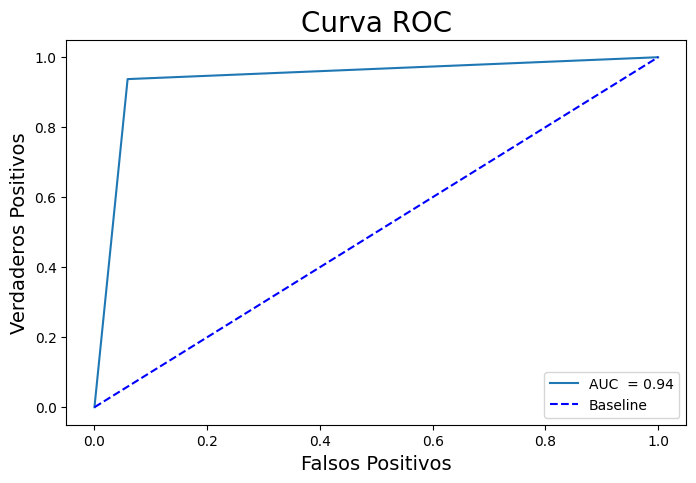

In [28]:
"""
Construir un clasificador que permita clasificar muestras de la clase virginia del resto.
"""

y_train_int = y_train.copy()
y_train_int[y_train_int == 1] = 0
y_train_int[y_train_int == 2] = 1
# Ahora tenemos una clase 0 ("setosa" y "versicolor") y 1 ("virginia")

# Igual con test
y_test_int = y_test.copy()
y_test_int[y_test_int == 1] = 0
y_test_int[y_test_int == 2] = 1

# Jugamos con "max_depth"
clf_int = tree.DecisionTreeClassifier(max_depth=1)
# Para hacerlo reproducible
np.random.seed(42)
# Entrenamos
clf_int.fit(X_train, y_train_int)

y_test_pred_int = clf_int.predict(X_test)
result1 = metrics.classification_report(y_test_int, y_test_pred_int)
print("Classification Report:",)
print (result1)

print(tree.export_text(clf_int))

iris=np.concatenate((X_train,y_train_int[:,np.newaxis]), axis=1)

#Creamos el dataframe
df_iris = pd.DataFrame(data=iris, columns=my_column_names)

#Cambiamos el valor de la variable de salida
df_iris.loc[df_iris['species'] == 0.0, 'species'] = 'otras'
df_iris.loc[df_iris['species'] == 1.0, 'species'] = 'virginia'

g = sns.pairplot(df_iris, hue='species')

probs = clf_int.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test_int, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_int, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend()

1.3. Modelo final.

- Sin embargo, la precisión de 0,98 es la evaluación del modelo (estimación del 
rendimiento). 

- Todavía tenemos que calcular el modelo final (el que enviará y 
utilizará la empresa) utilizando todos los datos disponibles.

In [29]:
final_clf = tree.DecisionTreeClassifier()

# Para que los resultados sean reproducibles
np.random.seed(42)

# Entrenamos (CON TODAS LAS MUESTRAS)
final_clf.fit(X, y)

# final_clf Tiene el modelo que usará la empresa
# La estimación de su accuracy la hemos obtenido antes (95%)

DecisionTreeClassifier()

1.4. Persistencia del modelo.

- Podemos almacenar (y posteriormente cargar) un modelo en un fichero.

In [30]:
from joblib import dump, load

# Guardar el modelo en un archivo
dump(final_clf, 'final_tree.joblib')

# Cargar el modelo desde un archivo
final_clf_reloaded = load('final_tree.joblib')

In [31]:
"""
El código final completo se vería así:
"""
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Dividimos el conjunto de datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creamos el árbol de decisión.
clf = tree.DecisionTreeClassifier()
np.random.seed(42)                  # lo hacemos reproducible
# Entrenamos el modelo
clf.fit(X_train, y_train)
# Obtenemos las predicciones sobre el conjunto de prueba
y_test_pred = clf.predict(X_test)
# Calculamos la precisión – accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
# Imprimimos dicho resultado
print(f"Accuracy of the tree: {accuracy_tree} ")

# Creamos el modelo final.
final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibility
final_clf.fit(X, y)

Accuracy of the tree: 0.98 


DecisionTreeClassifier()

Ejercicio 3. KNN

Hacer el aprendizaje, la predicción, la evaluación del modelo y la construcción del modelo final con KNN.
- Para la clasificación: 

from sklearn.neighbors import KNeighborsClassifier.

- Para la regresión: 

from sklearn.neighbors import KNeighborsRegressor

- Ayuda sobre KNN en sklearn: 

from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassidier)

- Para definirlo:
clf = KNeighborsClassifier()
(y lo entrenamos con .fit)

In [32]:
# Solución

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargamos los datos y los dividimos en entrenamiento y prueba.
datos = load_iris()
X_train, X_test, y_train, y_test = train_test_split(datos.data, datos.target, test_size=0.33, random_state=42)

# Creamos el modelo.
clf = KNeighborsClassifier()
# Entrenamos el modelo.
clf.fit(X_train, y_train)

# Realizamos las predicciones.
y_test_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo. Calculamos la precisión.
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the KNN: {accuracy} ")

# Entrenamos el modelo final (opcional).
final_clf = KNeighborsClassifier()
final_clf.fit(datos.data, datos.target)

Accuracy of the KNN: 0.98 


KNeighborsClassifier()

### <u>2. VALIDACIÓN CRUZADA.</u>

- Primero, vamos a hacer la validación cruzada con un bucle, para que entendamos mejor el proceso

- Sin embargo (!!), es mejor hacer la validación cruzada con la función *cross_val_score*, como haremos más adelante

- *KFold* crea los grupos de validación cruzada de entrenamiento/test.
    - *shuffle* mezcla aleatoriamente los datos antes de dividir los grupos. Siempre debemos hacer esto, a menos que tengamos buenas razones para lo contrario.
    - *random_state* hace que la mezcla sea reproducible

In [33]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

2.1. Qué es.

- Vamos a realizar la validación cruzada utilizando 5 agrupaciones.

- En cada iteración:
    - Entrenamos un modelo en las agrupaciones de entrenamiento
    - Calculamos predicciones en las agrupaciones de test
    - Calculamos la métrica (precisión - accuracy) y la almacenamos.

- Cuando el bucle de validación cruzada termina, calculamos la media (y std)  

TRAIN: [0 1 2 3 4] ... TEST: [ 9 12 18 19 26] ...
The accuracy for this crossval iteration is: 1.0
TRAIN: [1 2 3 5 6] ... TEST: [ 0  4 10 11 15] ...
The accuracy for this crossval iteration is: 0.9666666666666667
TRAIN: [0 1 2 3 4] ... TEST: [ 5  7 23 24 25] ...
The accuracy for this crossval iteration is: 0.9333333333333333
TRAIN: [0 1 4 5 7] ... TEST: [ 2  3  6  8 13] ...
The accuracy for this crossval iteration is: 0.9333333333333333
TRAIN: [0 2 3 4 5] ... TEST: [ 1 14 20 21 37] ...
The accuracy for this crossval iteration is: 0.9333333333333333
All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


Text(0, 0.5, 'Accuracy')

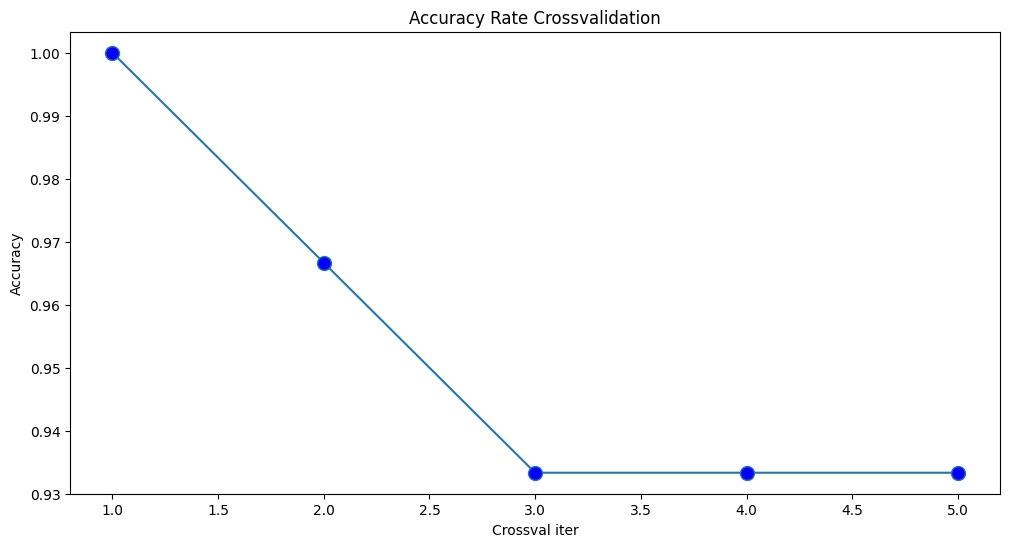

In [34]:
# Librerias
import numpy as np
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Para que los resultados sean reproducibles
np.random.seed(42)

# ASÍ NO!

# Variable que contendrá los 5 crossvalidation accuracies, una por iteración
scores = []

# Dividimos el conjunto de datos en 5 particiones
for train_index, test_index in cv.split(X):
    print(f"TRAIN: {train_index[:5]} ...", f"TEST: {test_index[:5]} ...")
    # Obtenemos las particiones de entrenamiento y prueba a partir de los índices
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # Creamos y entrenamos el modelo para esta iteración de crossvalidation
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    # Calculamos el accuracy
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)

    print(f"The accuracy for this crossval iteration is: {accuracy_tree}")
    # Almacenamos el accuracy en la lista
    scores.append(accuracy_tree)

# Transformamos la lista de accuracies a un numpy array
scores = np.array(scores)
print(f"All the accuracies are: {scores}")
# Imprimimos la media y la desviación típica
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

# Plotemos el accuracy de los k valores
plt.figure(figsize=(12, 6))
plt.plot([1, 2, 3, 4, 5], scores,marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate Crossvalidation')
plt.xlabel('Crossval iter')
plt.ylabel('Accuracy')

2.2. StratisfiedKFold.

Si estuvieramos en un problema desbalanceado, podríamos usar *Stratified k-fold cross-validation*. No es el caso, pero para practicar, podemos escribir la función de validación usando *StratifiedKFold*

- Para entender lo que hace la validación cruzada, hemos programado el bucle explícitamente

- Pero la validación cruzada se hace típicamente por medio de la función *cross_val_score*, como a continuación

In [35]:
from sklearn.model_selection import cross_val_score, KFold

# Creamos un k-fold crossvalidation con k=5
# shuffle = True --> reordena aleatoriamente los datos antes de dividirlos
# random_state = 42 --> para que sea reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Creamos el árbol de decisión sin valores especificados
clf = tree.DecisionTreeClassifier()

# Con esto conseguimos que los resultados sean reproducibles
np.random.seed(42)

# Todo el codigo anterior se reduce con esta función
scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


In [36]:
"""
Si estuvieramos en un problema desbalanceado, podríamos usar Stratified k-fold 
cross-validation. No es el caso, pero para practicar, podemos escribir la función 
de validación usando StratifiedKFold.
"""
from sklearn.model_selection import StratifiedKFold

# Creamos un Stratified k-fold crossvalidation con k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Creamos el árbol de decisión sin valores especificados
clf = tree.DecisionTreeClassifier()

# Con esto conseguimos que los resultados sean reproducibles
np.random.seed(42)

# Todo el codigo anterior se reduce con esta función
scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")


All the accuracies are: [1.         0.96666667 0.93333333 0.96666667 0.9       ]
And the average crossvalidation accuracy is: 0.95 +- 0.03


2.3. Modelo final

- Vemos que para nuestro caso no hay diferencia.

- 0.95 es la evaluación del modelo (estimación del rendimiento).

- Pero el modelo final debe entrenarse con todos los datos disponibles.

In [37]:
final_clf = tree.DecisionTreeClassifier()
# Para que los resultados sean reproducibles
np.random.seed(42)
# Entrenamos el modelo
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before

DecisionTreeClassifier()

In [38]:
"""
A continuación, tienes el código completo para la evaluación de validación cruzada 
y también la obtención del modelo final.
"""
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

# Creamos un k-fold crossvalidation con k=5
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Resultados reproducibles
np.random.seed(42)
# Calculamos el accuracy con crossvalidation
scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

# Imprimimos los resultados
print(f"The average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

# Creamos el modelo final
final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company

The average crossvalidation accuracy is: 0.95 +- 0.03


DecisionTreeClassifier()

### <u>3. MODIFICACIÓN DE LOS HIPERPARÁMETROS.</u>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

3.1. Gini vs entropía.

Vemos que los valores de gini y de la entropía son iguales, no mejora nada. Los siguientes ya empiezan a variar.

In [40]:
"""
Veamos el efecto de cambiar de gini a entropía. Aquí utilizamos holdout. 
Parece que los resultados son exactamente los mismos.
"""
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {criterion}: {accuracy_tree:.2f}")

With gini: 0.98
With entropy: 0.98


3.2. Max depth.

In [41]:
for max_depth in [1,2,3,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With max_depth {max_depth}: {accuracy_tree:.2f}")

With max_depth 1: 0.68
With max_depth 2: 0.98
With max_depth 3: 0.98
With max_depth None: 0.98


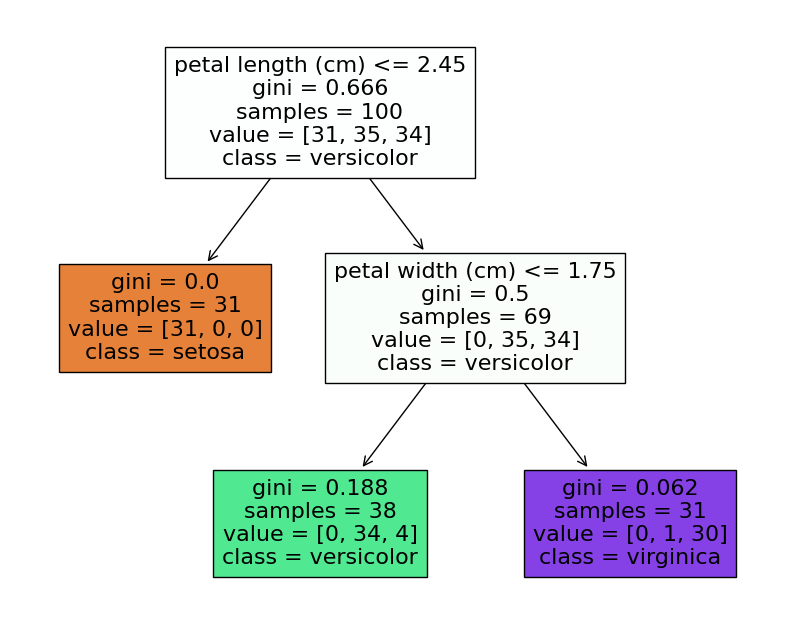

In [42]:
"""
Parece que max_depth=2 es suficiente. 
Visualicemos un árbol con profundidad máxima de 2.
"""
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
clf = tree.DecisionTreeClassifier(max_depth=2)
np.random.seed(42)
clf.fit(X_train,y_train)

_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

Classification Report (max_depth=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



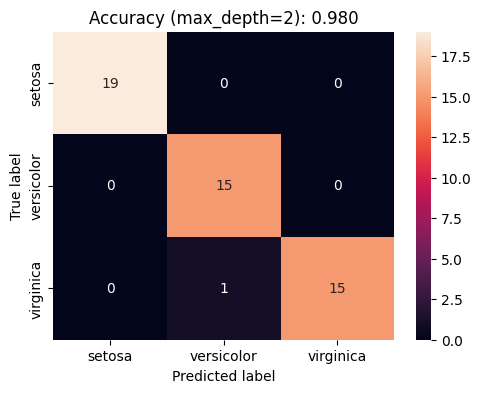

In [43]:
"""
Podemos comprobar si al limitar la profundidad del árbol hemos perdido precisión.
"""
import pandas as pd
import seaborn as sns

result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report (max_depth=2):",)
print (result1)

# Matriz de confusión
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Transformamos la matriz de confusión a un df para visualizarla mejor
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

# Ploteamos la matriz de confusión
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy (max_depth=2): {0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

3.3. Min samples splits.

Veamos los efectos de *min_samples_split*. El valor por defecto es 2.

In [44]:
for min_samples in [2,10,20,30,100]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_samples_split {min_samples}: {accuracy_tree:.2f}")

With min_samples_split 2: 0.98
With min_samples_split 10: 0.98
With min_samples_split 20: 0.98
With min_samples_split 30: 0.98
With min_samples_split 100: 0.68


3.4. Min impurity decrease.

- Se trata de otro hiperparámetro.

- Significa que sólo se crea un nuevo nivel del árbol si la ganancia de información:
    - es decir, la disminución de la entropía o gini, es mayor que el valor de *min_impurity_decrease*. 

- Es otra forma de controlar la profundidad del árbol.

With min_impurity_decrease 0.0: 0.98
With min_impurity_decrease 0.2222222222222222: 0.98
With min_impurity_decrease 0.4444444444444444: 0.30
With min_impurity_decrease 0.6666666666666666: 0.30
With min_impurity_decrease 0.8888888888888888: 0.30
With min_impurity_decrease 1.1111111111111112: 0.30
With min_impurity_decrease 1.3333333333333333: 0.30
With min_impurity_decrease 1.5555555555555554: 0.30
With min_impurity_decrease 1.7777777777777777: 0.30
With min_impurity_decrease 2.0: 0.30


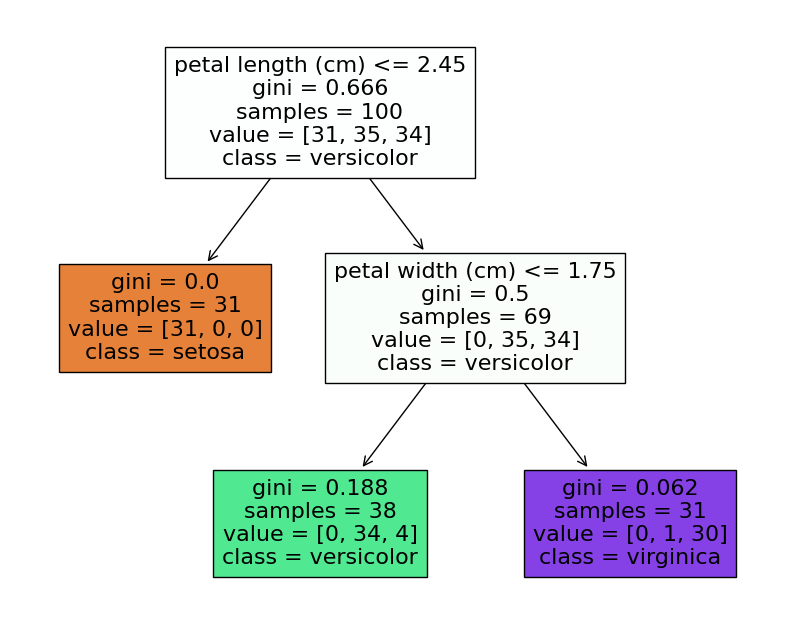

In [45]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_impurity_decrease {min_impurity_decrease}: {accuracy_tree:.2f}")

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
np.random.seed(42)
clf.fit(X_train,y_train)

_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

Ejercicio 4.

Comprobar el efecto de cambiar el hiperparámetro número de vecinos de KNN.

- Ayuda sobre KNN en sklearn:

from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)

- Lo definimos como:

clf = KNeighborsClassifier()

- Lo entrenamos con .fit.

- Más ayuda del clasificador KNN de sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Cambiamos el parámetro *n_neighbors* con valores de 1 a 100 tomados de cinco en cinco (*range(1,100,5)*), por ejemplo.


Puedes comprobar lo que ocurre al cambiar el hiperparámetro *weights*: :

- ‘uniform’ : Todos los puntos de cada vecindario se ponderan por igual.

- ‘distance’ : Ponderar los puntos por la inversa de su distancia. Es decir, los vecinos más cercanos de un nuevo punto de consulta tendrán una mayor influencia que los vecinos más alejados.

In [46]:
# Solución.


### <u>4. VARIABLES CATEGÓRICAS.</u>

Tratamiento de variables categóricas en DecisionTreeClassifier.

- La implementación de árboles de Sklearn **NO PUEDE** tratar con variables categóricas (en la mayoría de los casos).
- Deben convertirse en variables ficticias (one-hot-encoding).
- Los árboles Sklearn tampoco pueden tratar con valores faltantes (missing values)

El flujo de trabajo típico cuando se trabaja con scikit-learn es:

1. Cargar los datos como un Pandas dataframe

2. LLevar a cabo un proceso EDA (Exploratory Data Analysis) para entender/comprender sus datos. Y esto significa:
    - Cuántas instancias y atributos hay
    - Qué tipo de atributos hay (numéricos o categóricos). Esto se hace para comprobar si hay características categóricas que deban ser codificadas (como dummies / one-hot-encoding)
    - Qué atributos tienen valores faltantes, y cuántos
    - Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

3. Codificar el Pandas dataframe como una matriz numpy (transformar los valores categóricos y los valores faltantes)

4. Diseñar modelos de aprendizaje automático con scikit-learn

4.1. Fichero tennis.txt.

In [47]:
# This is for uploading tennis.txt from your hard drive into Colab

#from google.colab import files
#import io
#uploaded = files.upload()
#tennis_tmp = io.BytesIO(uploaded['tennis.txt'])

In [85]:
# There are other ways of accessing files from google colab
# https://neptune.ai/blog/google-colab-dealing-with-files
# Code below allows to mount your google drive and load data directly from GD
# from google.colab import drive
# drive.mount('/content/gdrive')

In [86]:
import os
# Cambia el directorio donde tengas los tutoriales con el fichero "tennis.txt"
#os.chdir("/content/gdrive/MyDrive/UNIVERSIDAD/23-24/Tutorial1")

In [49]:
import pandas as pd
tennis_df = pd.read_csv("tennis.txt", sep=",")

In [50]:
# Para comprobar el valor de las primeras instancias del dataframe
tennis_df.head()

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [51]:
# El dataset es pequeño y podremos visualizarlo por completo.
tennis_df

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [52]:
print('The shape of the data table is:')
print('===============================')
print(tennis_df.shape)
print()

print('The types of the attributes are:')
print('================================')
tennis_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(tennis_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(tennis_df.isnull().mean())

The shape of the data table is:
(14, 5)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sky          14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes

How many missing values per attribute:
Sky            0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Fraction of missing values per attribute:
Sky            0.0
Temperature    0.0
Humidity       0.0
Windy          0.0
Play           0.0
dtype: float64


In [53]:
# Comprobamos si el dataset se encuentra desequilibrado. 
print(tennis_df.Play.value_counts())
print("- - - - - - - - -")
print(tennis_df['Play'].value_counts())
print("- - - - - - - - -")
print(tennis_df['Play'].value_counts()/tennis_df['Play'].count())

# Vemos que no está demasiado desequilibrado.

Play
yes    9
no     5
Name: count, dtype: int64
- - - - - - - - -
Play
yes    9
no     5
Name: count, dtype: int64
- - - - - - - - -
Play
yes    0.642857
no     0.357143
Name: count, dtype: float64


4.2. Codificación.

Ahora vamos a codificar. 
- Nuestras características categóricas (sky y windy)

- La variable de salida (la clase: play)

Vamos a utilizar un ColumnTransformer, que permite procesar sólo algunas columnas en particular y deja a los demás como están.

In [54]:
"""Sepramos las variables."""
# variables de salida (y).
y_df = tennis_df['Play']
print(y_df)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


In [55]:
# variables de entrada(X).
X_df = tennis_df.drop('Play', axis=1)
print(X_df)

         Sky  Temperature  Humidity  Windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True


4.3. ColumnTransformer.

In [56]:
"""
Utilizaremos la función ColumnTransformer, 
que permite procesar sólo algunas columnas en particular, 
y deja las demás intactas (passthrough). 
En este caso, procesaremos sólo las categóricas.
La salida de esta transformación es una matriz numpy (!!)
"""
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']
"""
preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'),
                                    categorical_features)
                    ],
                    remainder='passthrough'
)
"""
preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'),
                                    categorical_features),
                    ('scaler', MinMaxScaler(),
                                    numeric_features)
                    ],
                    remainder='passthrough'
)

# Entrenamos el preprocesador
preprocessor.fit(X_df)
# Transformamos el conjunto de datos
X = preprocessor.transform(X_df)

print(X.shape)              # Notar que ahora hay 7 columnas.
print()

print(type(X))              # Notar que ahora es un numpy array, que puede ser usado por sklearn.
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle), but the last versions of sklearn
# return the names of variables, which is useful to understand where the variables come from

print(X)

from pprint import pprint
pprint(list(preprocessor.get_feature_names_out()))

(14, 7)

<class 'numpy.ndarray'>

[[0.         0.         1.         1.         0.         1.
  0.64516129]
 [0.         0.         1.         0.         1.         0.76190476
  0.80645161]
 [1.         0.         0.         1.         0.         0.9047619
  0.67741935]
 [0.         1.         0.         1.         0.         0.28571429
  1.        ]
 [0.         1.         0.         1.         0.         0.19047619
  0.48387097]
 [0.         1.         0.         0.         1.         0.04761905
  0.16129032]
 [1.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         1.         1.         0.         0.38095238
  0.96774194]
 [0.         0.         1.         1.         0.         0.23809524
  0.16129032]
 [0.         1.         0.         1.         0.         0.52380952
  0.48387097]
 [0.         0.         1.         0.         1.         0.52380952
  0.16129032]
 [1.         0.         0.         0.         1.         0.38095238
  0.80645161]

In [57]:
"""
Nos puede interesar que para las variables booleanas solo codifiquen una variable.
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    categorical_features)
                    ],
                    remainder='passthrough'
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 6 columns
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second column is the dummy for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed, but the last versions of sklearn
# return the names of variables, which is useful to understand where the variables come from

print(X)

from pprint import pprint
pprint(list(preprocessor.get_feature_names_out()))

(14, 6)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  0. 85. 85.]
 [ 0.  0.  1.  1. 80. 90.]
 [ 1.  0.  0.  0. 83. 86.]
 [ 0.  1.  0.  0. 70. 96.]
 [ 0.  1.  0.  0. 68. 80.]
 [ 0.  1.  0.  1. 65. 70.]
 [ 1.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  0. 72. 95.]
 [ 0.  0.  1.  0. 69. 70.]
 [ 0.  1.  0.  0. 75. 80.]
 [ 0.  0.  1.  1. 75. 70.]
 [ 1.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  0. 81. 75.]
 [ 0.  1.  0.  1. 71. 91.]]
['categorical__Sky_overcast',
 'categorical__Sky_rainy',
 'categorical__Sky_sunny',
 'categorical__Windy_True',
 'remainder__Temperature',
 'remainder__Humidity']


In [58]:
"""
A veces lleva mucho tiempo enumerar todas las columnas categóricas. 
Podemos utilizar seleccionar los tipos de columnas que queremos transformar.
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    selector(dtype_include=["object","bool"]))
                    ],
                    remainder='passthrough'
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 6 columns
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)

print(X)

(14, 6)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  0. 85. 85.]
 [ 0.  0.  1.  1. 80. 90.]
 [ 1.  0.  0.  0. 83. 86.]
 [ 0.  1.  0.  0. 70. 96.]
 [ 0.  1.  0.  0. 68. 80.]
 [ 0.  1.  0.  1. 65. 70.]
 [ 1.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  0. 72. 95.]
 [ 0.  0.  1.  0. 69. 70.]
 [ 0.  1.  0.  0. 75. 80.]
 [ 0.  0.  1.  1. 75. 70.]
 [ 1.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  0. 81. 75.]
 [ 0.  1.  0.  1. 71. 91.]]


4.4. LabelEncoder.

Para codificar la clase (variable de salida) con enteros. 

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


4.5. Modelo final.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creamos el árbol de decisión
clf = tree.DecisionTreeClassifier()
np.random.seed(42)      # reproducibilidad
# Entrenamos el modelo
clf.fit(X_train, y_train)
# Obtenemos las predicciones sobre el conjunto de prueba
y_test_pred = clf.predict(X_test)
# Calculamos el accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
# Imprimimos resultados
print(f"Accuracy of the tree: {accuracy_tree} ")
result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

# Finalmente, creamos el modelo final.
final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibilidad
final_clf.fit(X, y)

Accuracy of the tree: 0.4 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



DecisionTreeClassifier()

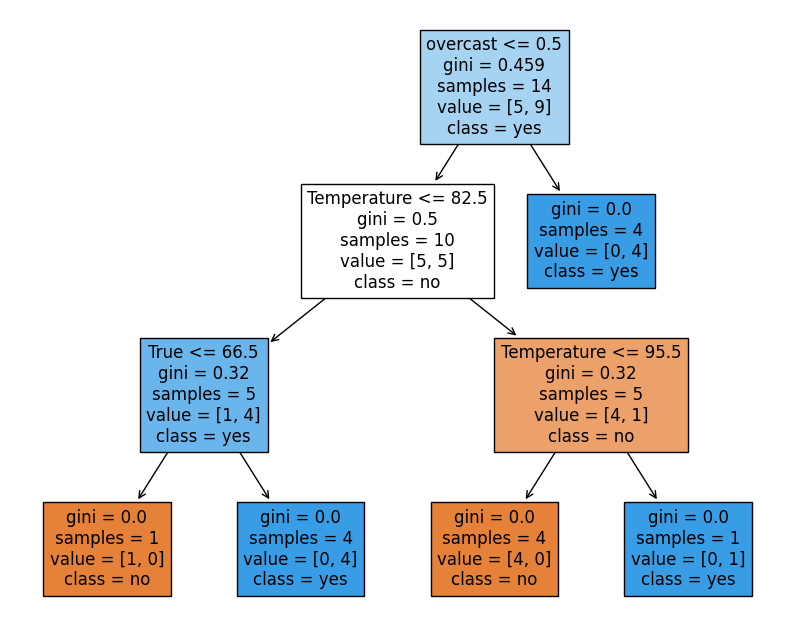

In [61]:
# Ploteamos el modelo.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

_ = tree.plot_tree(final_clf,
                   feature_names = list(sorted(X_df['Sky'].unique())) + list(sorted(X_df['Windy'].unique())) + ['Temperature', 'Humidity'],
                   class_names= list(sorted(y_df.unique())),
                   filled=True)

In [62]:
"""
Dado que se trata de un problema de clasificación de 2 clases, 
podemos construir un intervalo de confianza para la precisión. 
Podemos ver que es muy inexacta ...
"""
from statsmodels.stats.proportion import proportion_confint

print(f"Only {len(y_test)} instances on the testing partition")
print(f"Tree accuracy: {accuracy_tree} ")
proportion_confint(len(y_test)* accuracy_tree, len(y_test), method="wilson" )

# Una clasificación bastante desastrosa, lo podemos comprobar viendos sus valores AUC.

Only 5 instances on the testing partition
Tree accuracy: 0.4 


(0.11762077423264788, 0.7692757187239871)

Ejercicio 5. Curva ROC.

Dibujar la curva ROC con el valor AUC.

In [ ]:
# Solución.


## Árboles de regresión.

---

### <u>1. EVALUACIÓN HOLDOUT.</u>

Carguemos el dataset de Boston y comprobemos su descripción. Sus datos sobre precios de la vivienda en función de las características de la zona.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
housing_meta = fetch_california_housing()

X = housing_meta.data
y = housing_meta.target

In [64]:
# Imprimimos una descripción del conjunto de datos.
print(housing_meta.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [65]:
print(housing_meta.keys())
print(X.shape, y.shape)    
# Para ver el tamaño exacto --> 20640 filas por 8 columnas.

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8) (20640,)


1.1. Pre–proceso.

In [66]:
# Lo pasamos a un data frame para comprobar su contenido
housing = pd.DataFrame(housing_meta.data, columns=housing_meta.feature_names)
# Añadimos la variable objetivo a este data frame
housing['MEDV'] = housing_meta.target
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1.2. Valores nulos.

In [67]:
"""
Comprobamos si tienen valores nulos las columnas -> el número de nulos que 
tengo se muestra así.
"""
housing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

/var/folders/ml/mz8g3fjs6yx9r1x1mf1xvh2w0000gn/T/ipykernel_30487/2451079512.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['MEDV'], bins=30)


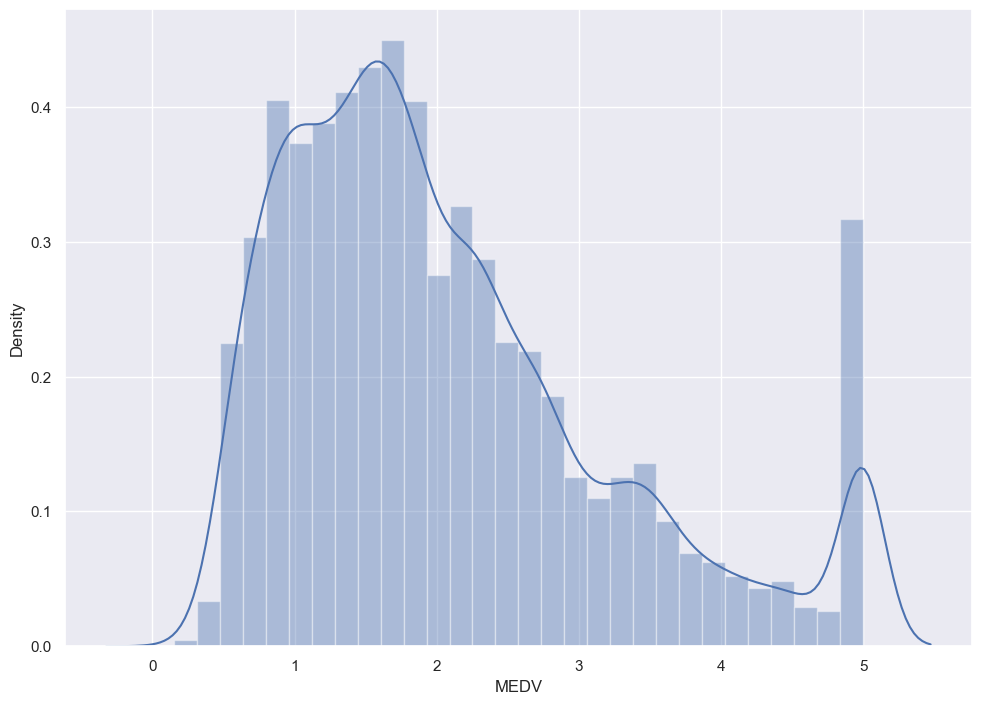

In [68]:
"""
Pintamos la distribución de los valores de la variable objetivo
esto crea un error y dice que uses otra funcion "displot".
"""
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing['MEDV'], bins=30)
plt.show()

1.3. Correlación de las variables.

<Axes: >

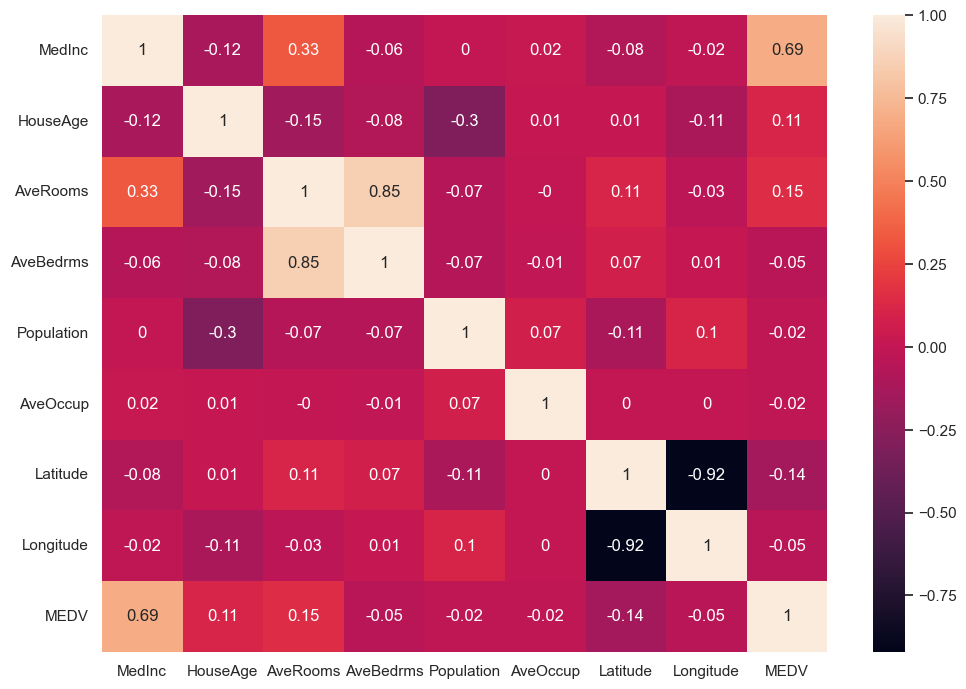

In [69]:
"""
Parece que sigue una distribución normal con algunos outliers 
(podríamos pensar en eliminarlos). 
Pasemos a analizar la correlación de las variables.
"""
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

1.4. Variables de alta correlación: Longitude y latitude.

Podemos ver ciertas cosas para más adelante:

- Las variables `'Longitude'` y `'Latitude'` tienen una alta correlación (-0.92). ¿Es necesario tener las dos en el modelo que voy a construir?

- La variable objetivo `'MDEV'` está bastante correlada con la variable `'MedInc'` (0.69). ¿Sería suficiente generar un modelo con sólo esta variable? Vamos a dibujar la distribucción de los puntos de estas dos variables

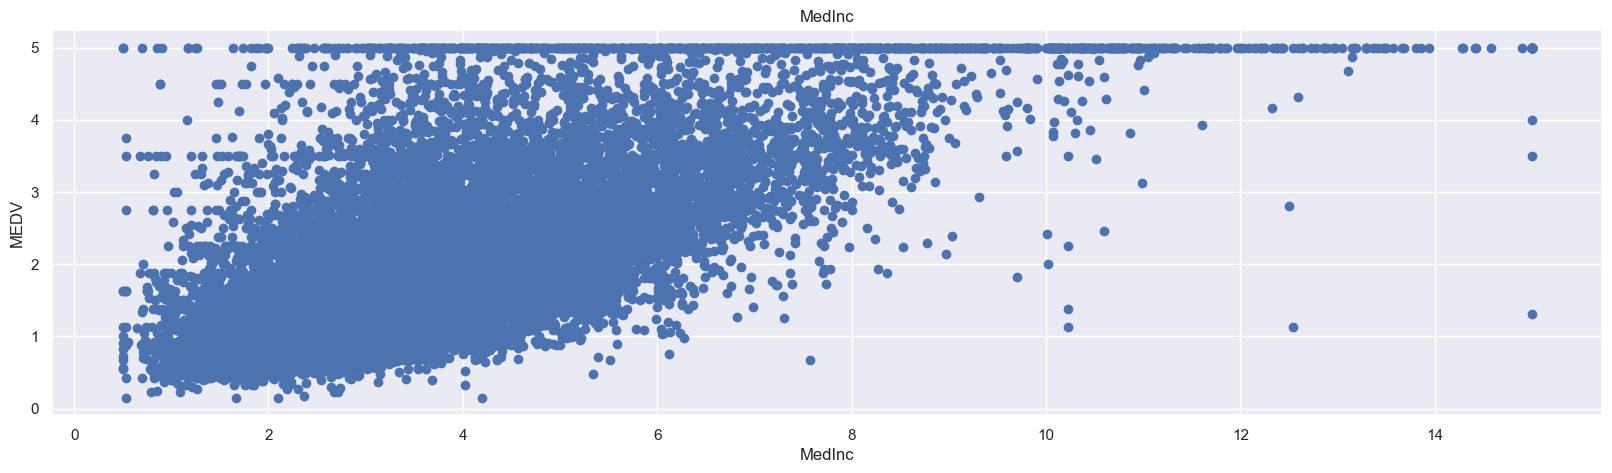

In [70]:
# Ploteamos la relación entre las variables.
plt.figure(figsize=(20, 5))

features = ['MedInc']
target = housing['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

1.5. RMSE.

El principal cambio es que utilizamos un DecisionTreeRegressor y la métrica es ahora RMSE.

No es clasificador.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.7389833060012664
R2 of the tree: 0.5901998494133869


1.6. Otros errores.

MSE: el error medio cuadrático. √[1/n∑(y-Y)^2]
MAE: el error medio absoluto. 1/n∑|y-Y|
R^2: el coeficiente de determinación. 1-[(y-Y)^2]/∑(y-Y)^2

- r^2 < 0,5 => no existe casi ajuste
- 0,5 < r^2 < 0,8 => existe un ajuste moderado
- 0,8 < r^2 => existe un buen ajuste
---

El RMSE es 0.73 => el error es del 73%. R^2 es bajo, se debería incrementar.

In [72]:
# ¿Es mejor que un regresor trivial?
from sklearn.dummy import DummyRegressor

regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))
r2_mean = metrics.r2_score(y_test, regr_mean.predict(X_test))

print(f"RMSE of the tree: {rmse_tree}")
print(f"RMSE of dummy(mean): {rmse_mean}")
print(f"R2 of the tree: {r2_tree}")
print(f"R2 of dummy(mean): {r2_mean}")
print(f"RMSE ratio tree/dummy(mean): {rmse_tree/rmse_mean}")
print(f"R2 ratio tree/dummy(mean): {r2_tree/r2_mean}")

# Solución.

# dummy puede ser cualquiera pero debe ser fijo. 
# Esto quiere decir que es 1,154 mas o menos, r^2 es malo

RMSE of the tree: 0.7389833060012664
RMSE of dummy(mean): 1.15439409553007
R2 of the tree: 0.5901998494133869
R2 of dummy(mean): -2.5448582275933163e-05
RMSE ratio tree/dummy(mean): 0.6401482031679511
R2 ratio tree/dummy(mean): -23191.855758956815


In [73]:
# ¿Y MAE?
mae_tree = metrics.mean_absolute_error(y_test, y_test_pred)

from sklearn.dummy import DummyRegressor
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train, y_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test))

print(f"MAE of the tree: {mae_tree}")
print(f"MAE of dummy(median): {mae_median}")
print(f"MAE ratio tree/dummy(median): {mae_tree/mae_median}")

MAE of the tree: 0.47762681738109225
MAE of dummy(median): 0.8865130930710511
MAE ratio tree/dummy(median): 0.5387701784826454


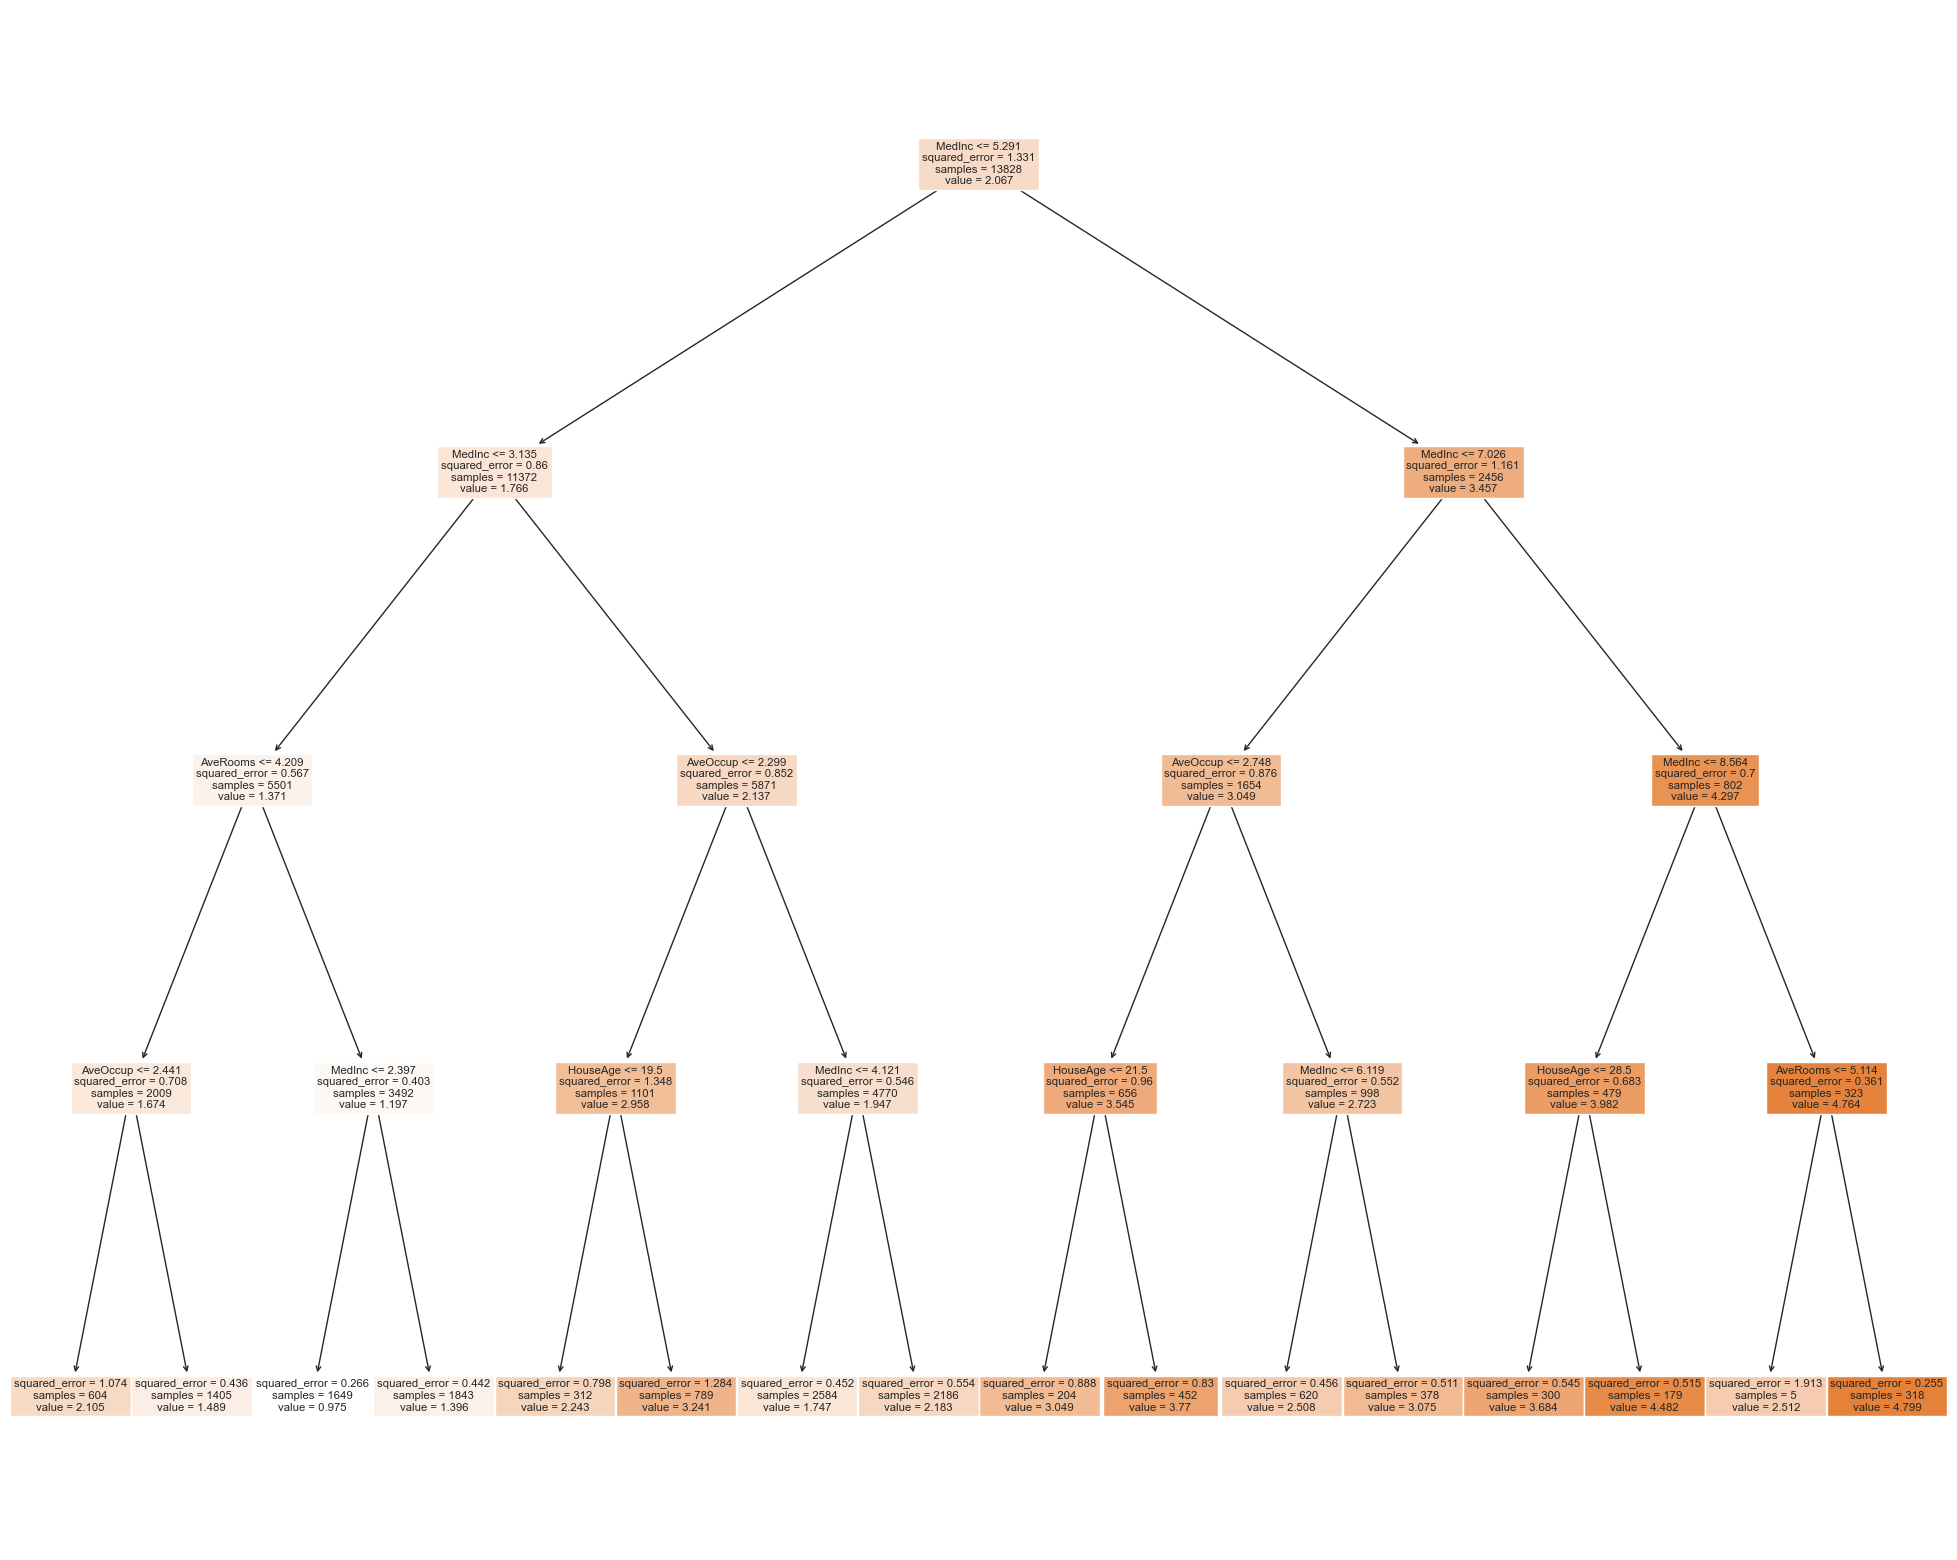

In [74]:
# El árbol tiene más de 10 niveles y es muy difícil de visualizar. 
# Visualicemos uno con sólo cuatro niveles.

# Dibujamos el árbol.
regr = tree.DecisionTreeRegressor(max_depth=4)
np.random.seed(42) # reproducibilidad
# Entrenamos el modelo.
regr.fit(X_train, y_train)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(regr,
                   feature_names = housing_meta.feature_names,
                   filled=True)

# En vez de obtener la clase, te dice el valor, la salida que deberiamos tener. 
# Es un estimador por lo que tambien da un error

### <u>2. ENTRENAMOS CON MODEL TREE.</u>

2.1. Instalación y más info.

In [ ]:
# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# IMPORTANT: This implementation of Model Trees is able to deal with Categorical Features (whose values are encoded as integers 0,1,2, ...)
# in order to use categorical features, the parameter categorical_features must be used.


#!pip install --upgrade linear-tree
#!pip install pydot
#!pip install graphviz

2.2. Creación.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(42) # reproducibility

# Entrenamos el modelo
regr.fit(X_train, y_train)
# Obtenemos las predicciones sobre el conjunto de prueba
y_test_pred = regr.predict(X_test)
# Calculamos el accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)

# Imprimimos resultados
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

# Solución.
# Aproxima mejor que uno normal ya que obtenemos que el RMSE es de 0,6. 
# Y el R^2 es de 0,72 que está mejor

RMSE of the tree: 0.6016182387081401
R2 of the tree: 0.728390568655922


In [88]:
# Pintamos el árbol resultante.
regr.plot_model(feature_names=housing_meta.feature_names)

FileNotFoundError: [Errno 2] "dot" not found in path.